# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

In [2]:
# import libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl

In [3]:
#import du jeu de données
data=pd.read_csv("data/Speed Dating Data.csv", encoding = "ISO-8859-1")

In [4]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(8378, 195)

In [5]:
data.columns #nous avons 195 colonnes, dont une belle majorité ne nous aidera pas dans cette analyse

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

## Preprocessing et cleaning

In [8]:
#Now let's focus on variables that will be interesting to have a look on this study :
dating = data.drop(columns=["iid",
"id",
"idg",
"condtn",
"round",
"position",
"positin1",
"order",
"partner",
"pid",
"field",
"mn_sat",
"tuition",
"from",
"zipcode",
"income","career",
"undergra",
"sports","tvsports","exercise","dining",
"museums","art","hiking","gaming","clubbing","reading","tv",
"theater","movies","concerts","music","shopping","yoga","exphappy",
"expnum","attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1",
"attr4_1","sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1","attr2_1","sinc2_1",
"intel2_1","fun2_1","amb2_1","shar2_1","attr3_1","sinc3_1","fun3_1",
"intel3_1","amb3_1","attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1","dec","attr","sinc",
"intel","fun","amb","shar","like","prob","met","match_es",
"attr1_s","sinc1_s","intel1_s",
"fun1_s","amb1_s","shar1_s","attr3_s","sinc3_s","intel3_s",
"fun3_s","amb3_s","satis_2","length","numdat_2",
"attr7_2","sinc7_2","intel7_2","fun7_2","amb7_2","shar7_2",
"attr1_2","sinc1_2","intel1_2","fun1_2","amb1_2","shar1_2",
"attr4_2","sinc4_2","intel4_2","fun4_2","amb4_2","shar4_2",
"attr2_2","sinc2_2","intel2_2","fun2_2","amb2_2","shar2_2","attr3_2",
"sinc3_2","intel3_2","fun3_2","amb3_2","attr5_2","sinc5_2",
"intel5_2","fun5_2","amb5_2","you_call","them_cal","date_3","numdat_3","num_in_3",
"attr1_3","sinc1_3","intel1_3","fun1_3","amb1_3","shar1_3","attr7_3","sinc7_3",
"intel7_3","fun7_3","amb7_3","shar7_3","attr4_3","sinc4_3","intel4_3","fun4_3",
"amb4_3","shar4_3","attr2_3","sinc2_3","intel2_3","fun2_3","amb2_3","shar2_3"]).drop_duplicates()

In [9]:
dating.shape #pour afficher la taille du dataset, nous avons décidé de garder que 42 colonnes

(8377, 42)

In [10]:
# Before starting to work on Data, let's see basic statics of my data :
#We see that we have 8378 rows which contains a lot of NaN values, how much are they :
dating.isnull().sum()

gender         0
wave           0
match          0
int_corr     157
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       211
sinc_o       286
intel_o      305
fun_o        359
amb_o        721
shar_o      1075
like_o       249
prob_o       317
met_o        384
age           94
field_cd      81
race          62
imprace       78
imprelig      78
goal          78
date          96
go_out        78
career_c     137
attr3_3     4403
sinc3_3     4403
intel3_3    4403
fun3_3      4403
amb3_3      4403
attr5_3     6361
sinc5_3     6361
intel5_3    6361
fun5_3      6361
amb5_3      6361
dtype: int64

In [11]:
dating["met_o"].unique() #Dans cette doc,cette variable contient uniquement 1 ou 2 donc les valeurs nan,3,...,8 sont aberrantes, on va les enlever

array([ 2.,  1., nan,  3.,  5.,  6.,  7.,  8.])

In [12]:
#on constate que la variable met ne contient que 1 et 2, Or dans la data on va d'autres valeurs aberrantes
#nous les avons supprimé : 

dating = dating.drop(dating[dating["met_o"] == 3].index)
dating = dating.drop(dating[dating["met_o"] == 5].index)
dating = dating.drop(dating[dating["met_o"] == 6].index)
dating = dating.drop(dating[dating["met_o"] == 7].index)
dating = dating.drop(dating[dating["met_o"] == 8].index)

In [13]:
dating["met_o"].value_counts()

2.0    7635
1.0     350
Name: met_o, dtype: int64

In [14]:
#nous allons enlever les lignes nulles de notre dataset 
dating=dating.dropna().reset_index().drop(['index'], axis=1)
dating.shape

(1596, 42)

## Statistiques descriptives

In [15]:
#Statistique descriptive
dating.describe(include='all')
#it looks like that most of my variables were encoded into a categorical numbers
#ok let's move into steps, to see closer what is inside!

,gender,wave,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,...,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,0.437970,15.010652,0.186717,0.226942,0.422306,26.662281,2.895990,24.222362,17.632625,20.116059,...,7.001880,8.050125,8.078321,7.565163,7.158521,6.787594,7.649123,7.944862,7.138471,7.045739
std,0.496293,3.819010,0.389806,0.295920,0.494082,3.409462,1.285739,13.369440,7.898146,7.410455,...,1.401073,1.541483,1.351467,1.567744,1.786907,1.516264,1.498067,1.332297,1.665508,1.690405
min,0.000000,10.000000,0.000000,-0.700000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,0.000000,11.000000,0.000000,0.030000,0.000000,24.000000,2.000000,15.000000,14.000000,15.000000,...,6.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,0.000000,14.000000,0.000000,0.250000,0.000000,26.000000,2.000000,20.000000,20.000000,20.000000,...,7.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,1.000000,19.000000,0.000000,0.450000,1.000000,29.000000,4.000000,30.000000,20.000000,25.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,1.000000,21.000000,1.000000,0.880000,1.000000,55.000000,6.000000,95.000000,47.000000,50.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Matrice de corrélation

In [16]:
#First Step : Let's have a look on data 
#I would like to know the correlation between my variables
corr=dating.corr()

In [17]:
#All right, i see many numbers, but what i am interested in is to see which ones are correlated to others
#I would like to know top features that are correlated :
ranking =corr.stack().sort_values(ascending=False).reset_index()
ranking.columns = ['variable_1', 'variable_2','%corr']
ranking_filtered=ranking.loc[(ranking['%corr']<0.9999)&(ranking['%corr']>0.5)].drop_duplicates(subset=['%corr'])
corr_ranking=ranking_filtered.reset_index().drop(['index'], axis=1)
corr_ranking

,variable_1,variable_2,%corr
0,attr3_3,attr5_3,0.850144
1,fun3_3,fun5_3,0.774151
2,intel5_3,intel3_3,0.678611
3,like_o,fun_o,0.670361
4,intel_o,sinc_o,0.649116
5,like_o,attr_o,0.636438
6,like_o,shar_o,0.635086
7,sinc3_3,sinc5_3,0.627998
8,amb5_3,amb3_3,0.604715
9,amb_o,intel_o,0.600153


In [18]:
#Let's see what is inside that Dataframe, I choosed CSV for 370 rows
file_name = 'Matricedecorrelation.csv'
corr_ranking.to_csv(file_name)
print('File is written to CSV File successfully.')
#Now, we can only focus on variables that are correlated, may be we will understand the magic behind Love'

File is written to CSV File successfully.


<AxesSubplot:title={'center':'Correlation Heatmap'}>

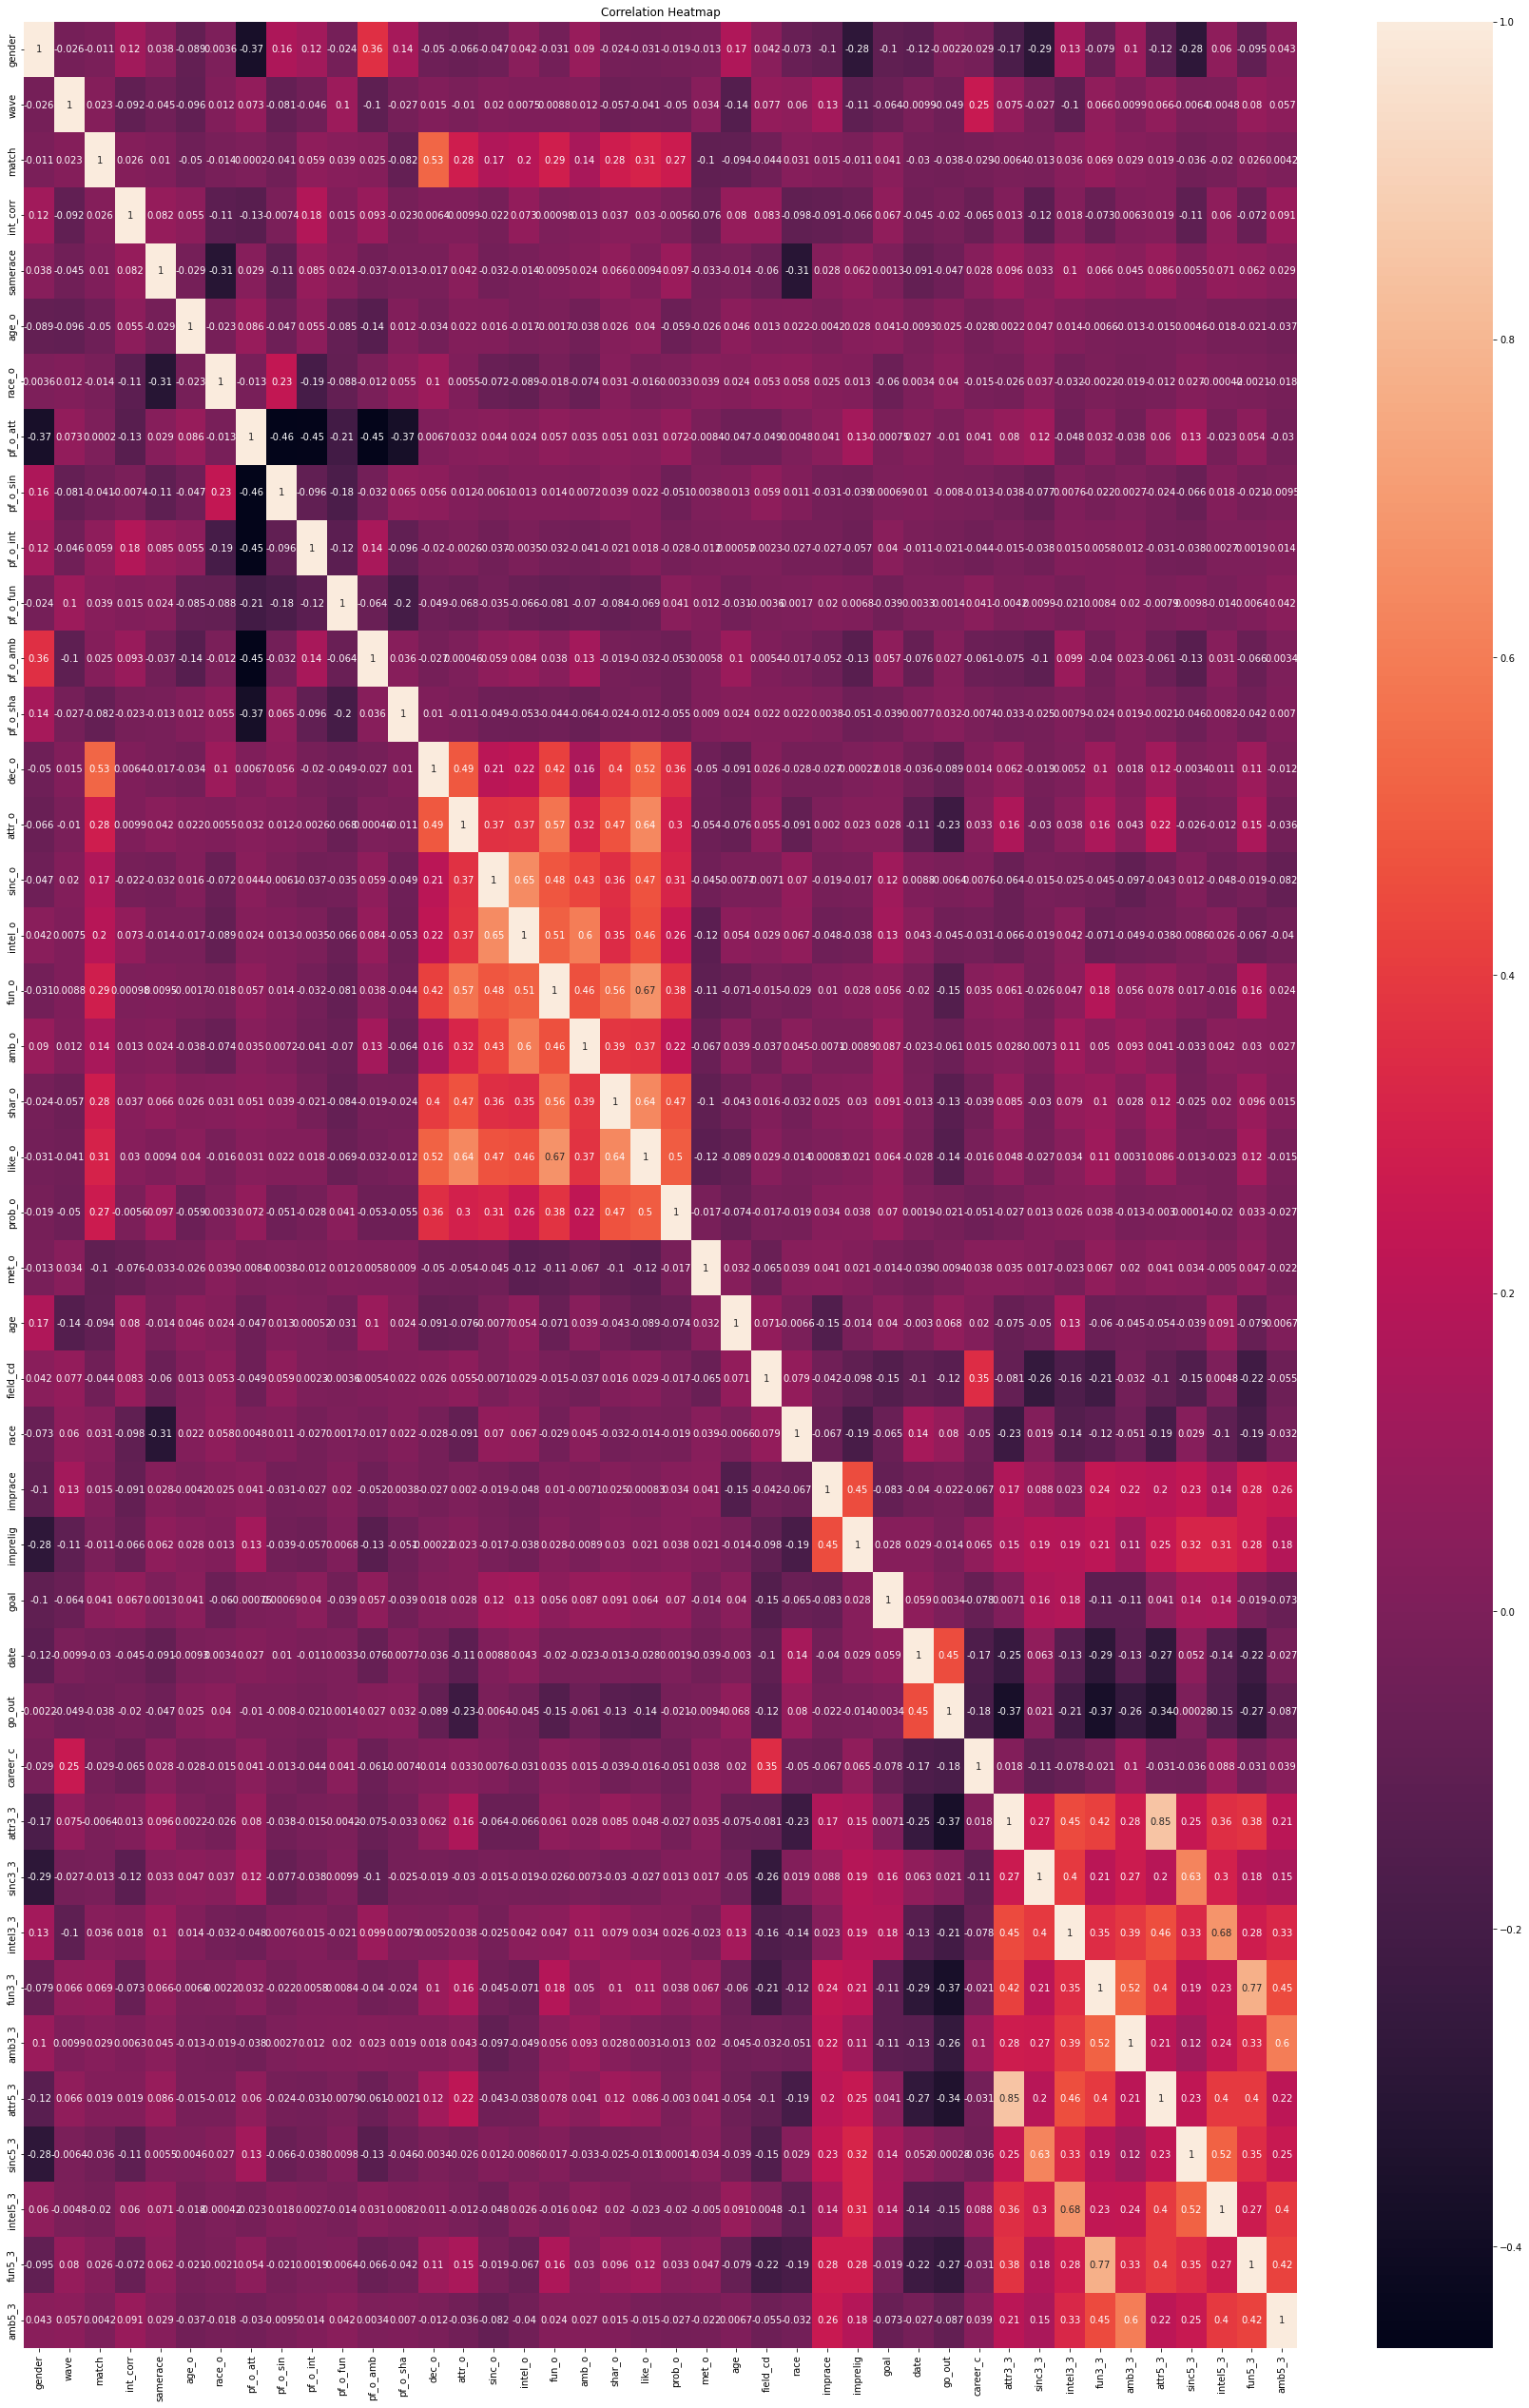

In [19]:
# heatmap for correlation matrix
f ,ax = plt.subplots(figsize=(30,45)) #afficher le graphique de corrélation entre les variables du dataset
ax.set_title("Correlation Heatmap")
sns.heatmap(corr,annot=True,ax=ax) #paramètres color map de matplotlib et non de seaborn

## EDA ( Visualisation)

In [1]:
# Analyse : 
# 1ere etape : on va essayer de faire un focus sur la population qui participe à ce genre d'évenements
# 2 eme etape : on va étudier le match en fonction des critères de choix du partenaire idéal
# 3 eme etape : Déduction de comment décrocher un match dans ce genre d'évenements ?

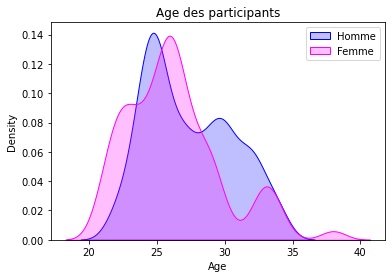

In [21]:
# 1 ère étape : 
#age distribution of participants
#La densité de la population se situe sur les moins de 30 ans
sns.kdeplot(dating[dating.gender == 1].age,
             shade=True, color='blue', label='Homme')
sns.kdeplot(dating[dating.gender == 0].age,
             shade=True, color='magenta', label='Femme')
plt.title('Age des participants')
plt.xlabel('Age')
plt.legend()

In [22]:
#afin d'avoir une visualisation globale de notre data :
    # On va créer une variable classe_age qui va segmenter les ages par tranche
    # On va reformater la variable gender par des paramètres homme/femme au lieu de 0,1
    # On va reformater la variable go_out par des éléments plus compréhensibles au lieu des chiffres 0,...7

In [23]:
# Création d'une classe age :
dating['classe_age'] = dating['age'].apply(lambda x : 'moins de 25 ans' if x < 25
                                                      else 'entre 25 ans et 30 ans' if (x >= 25 and x < 30)
                                                      else 'entre 30 ans et 35 ans' if (x >= 30 and x < 35)
                                                      else 'entre 35 ans et 40 ans' if (x >= 35 and x < 40)
                                                      else 'Plus de 40 ans')

In [24]:
#formatage de la variable gender et go out pour l'analyse :
dating.gender[dating.gender == 0] = "Female"
dating.gender[dating.gender == 1] = "Male"
dating.go_out[dating.go_out == 1] = "Almost everyday"
dating.go_out[dating.go_out == 2] = "Once or Twice a week"
dating.go_out[dating.go_out == 3] = dating.go_out[dating.go_out == 2]
dating.go_out[dating.go_out == 4] = "Once or Twice a month "
dating.go_out[dating.go_out == 5] = dating.go_out[dating.go_out == 4]
dating.go_out[dating.go_out == 6] = "Several times a year"
dating.go_out[dating.go_out == 7] = "Almost never"
#Several times a week=1
#Twice a week=2
#Once a week=3
#Twice a month=4
#Once a month=5
#Several times a year=6
#Almost never=7
dating.match[dating.match == 0] = "No"
dating.match[dating.match == 1] = "Yes"

/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/313256126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dating.gender[dating.gender == 0] = "Female"
/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/313256126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dating.go_out[dating.go_out == 1] = "Almost everyday"
/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/313256126.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [25]:
#qu'en est il de la pondération du genre ?  
#gender: Female=0 Male=1
PonderationGenre = round(pd.crosstab(dating['gender'],columns="count", normalize=True)*100,2)
PonderationGenre.astype(str).apply(lambda x:x+ '%')

col_0,count
gender,
Female,56.2%
Male,43.8%


In [26]:
# on peut constater que le ratio homme/femme est à peu près similaire.
# Qu'en est-il des âges ?
tcd_age_gender = round(pd.crosstab(dating['classe_age'],dating['gender'], normalize=True),2)#.astype(str).apply(lambda x:x+ '%')
PonderationGenreage = tcd_age_gender.sort_values(['Female','Male'],axis = 0, ascending = False,inplace = False,na_position = "first")
#PonderationGenreage.set_axis(['Femme', 'Homme'],axis='columns', inplace=True)
#PonderationGenreage['classe_age'] = PonderationGenreage['age'].apply(lambda x : 'moins de 25 ans' if int(x) < 30
#                                                      else 'entre 25 ans et 30 ans' if (int(x) > 25) and (int(x) < 30)
#                                                      else 'entre 30 ans et 35 ans' if (int(x) >= 30) and (int(x) < 35)
#                                                     else 'entre 35 ans et 40 ans' if (int(x) >= 35) and (int(x) < 40)
#                                                     else 'Plus de 40 ans')

In [27]:
# Voyons voir le résultat en chiffre : 
PonderationGenreage
# on retient que la densité de la population des participants est centrée en moins de 30 ans,
#qui ont tendance beaucoup plus participer plus à ce genre evenements que les plus de 30 ans

gender,Female,Male
classe_age,,
entre 25 ans et 30 ans,0.30,0.21
moins de 25 ans,0.18,0.10
entre 30 ans et 35 ans,0.07,0.13
entre 35 ans et 40 ans,0.01,0.00


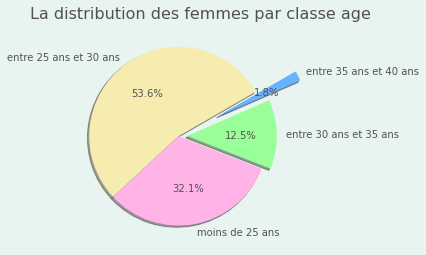

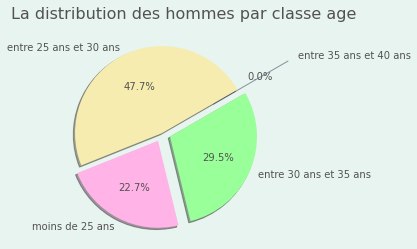

In [28]:
# Pie chart where each of the elements will be arranged counter-clockwise

# Create subplots and a pie chart
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
explode = (0, 0,0.1,0.5)
fig, ax = plt.subplots(figsize=(4, 7), facecolor='#e8f4f0')
labels = PonderationGenreage.index
sizes_female = PonderationGenreage['Female']
ax.pie(sizes_female, labels=labels, colors=colors, startangle=30, textprops={'color':font_color}, autopct='%1.1f%%',shadow=True,explode=explode)
# Set title, its position, and font size
title = plt.title('La distribution des femmes par classe age', fontsize=16,color=font_color,)
title.set_position([0.6, 1.02])
mpl.rcParams['font.size'] = 10.0

# Create subplots and a pie chart
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
explode = (0, 0.1,0.1,0.7)
fig, ax = plt.subplots(figsize=(7, 4), facecolor='#e8f4f0')
labels = PonderationGenreage.index
sizes_male = PonderationGenreage['Male']
ax.pie(sizes_male, labels=labels, colors=colors, startangle=30, textprops={'color':font_color}, autopct='%1.1f%%',shadow=True,explode=explode)
# Set title, its position, and font size
title = plt.title('La distribution des hommes par classe age', fontsize=16,color=font_color,)
title.set_position([0.6, 1.02])
mpl.rcParams['font.size'] = 10.0

In [29]:
#Qu'en est il de la distribution de l'âge hommes/femmes à ce type d'évenements ?
#les hommes sont plus ages que les femmes dans ce type d'événement
#pour la suite de cette étude, nous allons nous focaliser uniquement sur les moins de 30 ans 
#car leur densité est plus imposée dans la data contrairement aux autres ages

In [2]:
#est ce que les hommes ont tendance à sortir beaucoup (goout) avant d'assister à ce type de date?
#How often do you go out (not necessarily on dates)?
#nous allons filtrer dating sur les moins de 30 ans :
dating_less35years=dating.loc[(dating['age']<35)]
#fig = px.histogram(dating_less35years.dropna(), x="gender", y="age",color="go_out",nbins=15)
fig = px.box(dating_less35years.dropna(), x="gender", y="age", color="go_out",
            #  notched=True, # used notched shape
             title="Qui sort à un plus jeune âge?",
             hover_data=["go_out"] # add day column to hover data
            )
fig.show()
#la tendance dit que les femmes sortent depuis un plus jeune age que les hommes,
#et à partir de 25 ans, les femmes commencent à moins sortir dehors. 

NameError: name 'dating' is not defined

In [31]:
# 2 eme etape : on va étudier l'évolution match en fonction des critères de choix du partenaire idéal

In [32]:
#how many people got a match after dating via speed dating : 
pd.crosstab(index=dating_less35years['match'],columns="count")
#only 26% got a match !

col_0,coubt
match,
No,1014
Yes,254


In [33]:
#reformatage de la variable match pour l'EDA
dating_less35years['match']=dating_less35years['match'].apply(lambda x: 1 if x == 'Yes'
                                                                   else 0)

/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/2724625684.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
dating_less35years.columns.values

array(['gender', 'wave', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age',
       'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3',
       'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3',
       'classe_age'], dtype=object)

In [35]:
corr = dating_less35years.corr() #corrélation entre les variables 
corr_less30years = corr.loc['match'].sort_values(ascending=False).head()
corr_less30years

match     1.000000
dec_o     0.524763
like_o    0.322267
fun_o     0.301829
attr_o    0.295589
Name: match, dtype: float64

In [36]:
C = round(pd.crosstab(dating_less35years['match'],dating_less35years['gender'],normalize=True)*100,2).astype(str).apply(lambda x:x+ '%')
C
#PonderationMatchGender = A.sort_values(['Female','Male'],axis = 0, ascending = False,inplace = False,na_position = "first")

gender,Female,Male
match,,
0,48.82%,31.15%
1,12.46%,7.57%


In [37]:
D = round(pd.crosstab(dating_less35years['go_out'],dating_less35years['match'],normalize=True)*100,2)#.astype(str).apply(lambda x:x+ '%')
D['%match_goout']=round(D[1]/D[0],2)*100
D.sort_values(['%match_goout'],axis=0,ascending=False)

#on peut déduire que ceux qui sortent le plus ont plus de chance 
#de matcher par rapport aux autres.

match,0,1,%match_goout
go_out,,,
Once or Twice a month,4.21,1.85,44.0
Almost everyday,34.94,11.31,32.0
Once or Twice a week,38.85,8.22,21.0
Several times a year,0.62,0.00,0.0


In [38]:
D = round(pd.crosstab(dating_less35years['goal'],dating_less35years['match'],normalize=True)*100,2)#.astype(str).apply(lambda x:x+ '%')
D['%match_goal']=round(D[1]/D[0],2)*100
D.sort_values(['%match_goal'],axis=0,ascending=False)

#goal:
#What is your primary goal in participating in this event? 
#Seemed like a fun night out=1
#To meet new people=2
#To get a date=3
#Looking for a serious relationship=4
#To say I did it=5
#Other=6


match,0,1,%match_goal
goal,,,
5.0,4.26,1.50,35.0
6.0,3.23,1.10,34.0
2.0,33.36,8.91,27.0
3.0,5.68,1.50,26.0
1.0,33.44,7.02,21.0


In [44]:
#formatage de la variable goal pour l'analyse :
dating_less35years.goal[dating_less35years.goal == 1] = "Fun night out"
dating_less35years.goal[dating_less35years.goal == 2] = "To meet new people"
dating_less35years.goal[dating_less35years.goal== 3] = "To get a date"
dating_less35years.goal[dating_less35years.goal == 4] = "Looking for a serious relationship"
dating_less35years.goal[dating_less35years.goal  == 5] = "To say I did it"
dating_less35years.goal[dating_less35years.goal == 6] = "Other"

/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/4076823688.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/4076823688.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipykernel_30565/4076823688.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/69/2xnjng8d15j5264htcrb3x640000gn/T/ipyker

In [45]:
fig = px.bar(dating_less35years[dating_less35years['match']==1], x="goal", y=["match"], facet_col="variable", color="gender")
fig.show()

#On constate que les personnes recherchant à rencontrer de nouvelles personnes ou à s'amuser matchent plus facilement que
#les autres types de relations

In [41]:
for col in dating_less35years.columns:
    
    if "like_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("like_o", "Like")
    if "attr_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("attr_o", "Attractive")
    if "sinc_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("sinc_o", "Sincere")
    if "intel_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("intel_o", "Intelligent")
    if "fun_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("fun_o", "Fun")
    if "amb_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("amb_o", "Ambitious")
    if "shar_o" in col.lower():
        dating_less35years.columns = dating_less35years.columns.str.replace("shar_o", "Shared_interests")


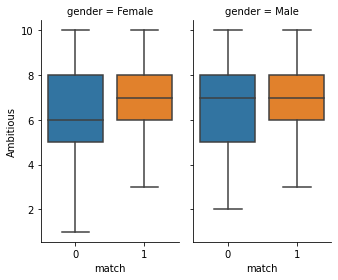

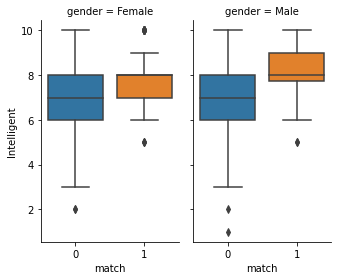

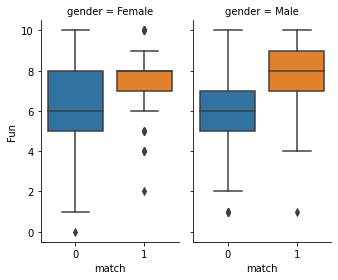

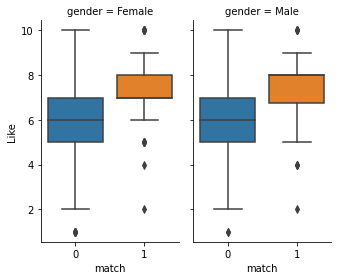

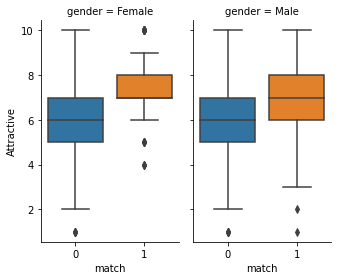

In [43]:
#sns.catplot(data=dating_less35years,x='gender',y='fun_o',kind='bar',hue='match')
sns.catplot(
    data=dating_less35years, x="match", y="Ambitious", col="gender",
    kind="box", height=4, aspect=.6,
)
sns.catplot(
    data=dating_less35years, x="match", y="Intelligent", col="gender",
    kind="box", height=4, aspect=.6,
)
sns.catplot(
    data=dating_less35years, x="match", y="Fun", col="gender",
    kind="box", height=4, aspect=.6,
)
sns.catplot(
    data=dating_less35years, x="match", y="Like", col="gender",
    kind="box", height=4, aspect=.6,
)
sns.catplot(
    data=dating_less35years, x="match", y="Attractive", col="gender",
    kind="box", height=4, aspect=.6,
)

#les hommes qui sont intelligents, qui ont de l'humour et une belle apparence physique sont appreciés ( like) 
#et matchent plus facilement
#Contrairement aux femmes où l'humour n'est pas souvent un critère de choix chez l'homme 
#mais plutôt,le physique...

En conclusion, pour décrocher un match au speed dating, il faut y aller dans un but de rencontrer de nouvelles personnes et/ou night fun
Pour un homme, il faut être intelligent, beau et fun. 
Pour une femme, il suffit d'avoir une belle apparence physique.